#               **SOLVING END TO END IMAGE CLASSIFICATION PROBLEM USING DEEP LEARNING**

   #                         **(dog VS cat) USING CNN AND VGG**

- This project focuses on image classification of cats and dogs using deep learning techniques.
- Initially, a custom convolutional neural network (CNN) was developed for the task, trained on a dataset of cat and dog images.
- To enhance performance, transfer learning with the VGG-16 model, a popular CNN architecture, was employed.
- The VGG-16 model was pretrained on the ImageNet dataset and fine-tuned on the cat and dog images dataset.
- The goal was to create an accurate classifier capable of distinguishing between cat and dog images effectively.
- The project provides a comprehensive exploration of the deep learning process, including model creation, problem-solving methods, and a comparative analysis between custom CNNs and pre-trained models like VGG-16.


### **Table of Contents**

1. [Creating Own Model Using CNN](#scrollTo=3b1d3523)
    - [1.1  Choosing dataset](#scrollTo=UYZswXjA7gFm)
    - [1.2  Initializing framework](#scrollTo=595cec5a)
    - [1.3  Data exploration and Preparation](#scrollTo=3cddf1b8)
    - [1.4  Creating and Compiling model](#scrollTo=aac85566)
    - [1.5  Visualizing the model](#scrollTo=12f97976)
    - [1.6  Training the model](#scrollTo=c763140a)
    - [1.7  Evaluating model](#scrollTo=6b75701a)
    - [1.8  More Data exploration](#scrollTo=8f5545e1)        
    - [1.9 Predicting outputs](#scrollTo=0a65e486)
2. [Retrain the Model](#scrollTo=3539e32d)
    - [2.1 Compiling models](#scrollTo=ok7GWhKh0NAs)
    - [2.2 Training the Model](#scrollTo=ssjrpky40uWi)
    - [2.3 Visualizing the model](#scrollTo=ZmDpJC4X1jkr)
3. [Creating Model Using Transfer Learning - VGG16](#scrollTo=c0b63ced)
    - [3.1 Formulating model](#scrollTo=1BIURHpA3oyX)
    - [3.2 Training the model](#scrollTo=wm85sVSf3v_J)
    - [3.3 Visualizing the model](#scrollTo=LT6OPfKV34VX)
    - [3.4 Evaluating the model](#scrollTo=2upDhb9W4Bmp)
    - [3.5 Predicting Outputs](#scrollTo=h07O6-H94ZB4)
4. [Comparison of VGG16 model result vs Retrain result](#scrollTo=6812f6d6)


![image.png](attachment:a22d6916-8154-447a-af89-6d8b400e267f.png)!

# **1.  Creating Own model using CNN**

####[Go Back To Top](#scrollTo=zffFUYjWv65x)

## **1.1  Choosing Dataset**
- Select a dataset with a balanced distribution of cat and dog images to ensure equal representation of classes.
- Choose a dataset with a sufficiently large sample size to facilitate effective model training and evaluation.

## **1.2  Initializing framework**

- Import necessary libraries including pandas, IPython.display, and TensorFlow.
- Ensure TensorFlow version compatibility by checking the installed version.
- Set up additional dependencies such as NumPy and matplotlib for data manipulation and visualization.

In [1]:
import pandas as pd
import IPython.display as display
import tensorflow as tf
from tensorflow.keras import layers
import numpy as np
import os,random
import matplotlib.pyplot as plt
print(tf.__version__)

2024-07-24 12:51:46.486018: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-24 12:51:46.486121: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-24 12:51:46.755666: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


2.15.0


## **1.3 Data exploration and Preparation**

- Clone the repository from the provided GitHub link to access the dataset.
- Organize and preprocess the dataset, which involves tasks such as resizing images and labeling them according to their classes.
- Split the dataset into training and validation sets to create a foundation for training and evaluating the image classification model.

In [2]:
! git clone https://github.com/patrick013/Image-Classification-CNN-and-VGG.git

/opt/conda/lib/python3.10/pty.py:89: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid, fd = os.forkpty()


Cloning into 'Image-Classification-CNN-and-VGG'...
remote: Enumerating objects: 37510, done.
remote: Counting objects: 100% (96/96), done.
remote: Compressing objects: 100% (88/88), done.
remote: Total 37510 (delta 43), reused 36 (delta 7), pack-reused 37414
Receiving objects: 100% (37510/37510), 812.51 MiB | 43.22 MiB/s, done.
Resolving deltas: 100% (48/48), done.
Updating files: 100% (50016/50016), done.


- IMAGE_HEIGHT=128 and IMAGE_WIDTH=128 standardize image dimensions for uniform preprocessing.
- BATCH_SIZE=64 determines the number of images processed simultaneously during training, enhancing efficiency.
- The DataFrame (df) organizes image data with filenames, category labels, and file paths for structured manipulation.

In [3]:
IMAGE_HEIGHT=128
IMAGE_WIDTH=128
BATCH_SIZE=64
def get_pathframe(path):
  '''
  Get all the images paths and its corresponding labels
  Store them in pandas dataframe
  '''
  filenames = os.listdir(path)
  categories = []
  paths=[]
  for filename in filenames:
    paths.append(path+filename)
    category = filename.split('.')[0]
    if category == 'dog':
      categories.append(1)
    else:
      categories.append(0)

  df= pd.DataFrame({
      'filename': filenames,
      'category': categories,
      'paths':paths
  })
  return df

- df.tail(5) displays the last 5 rows of the DataFrame, offering a snapshot of the dataset's tail end.


In [4]:
df=get_pathframe("Image-Classification-CNN-and-VGG/dataset/dataset/")
df.tail(5)

filename  category  \
24995   dog.2518.jpg         1   
24996  dog.10815.jpg         1   
24997  cat.10023.jpg         0   
24998   cat.4613.jpg         0   
24999   dog.8834.jpg         1   

                                                   paths  
24995  Image-Classification-CNN-and-VGG/dataset/datas...  
24996  Image-Classification-CNN-and-VGG/dataset/datas...  
24997  Image-Classification-CNN-and-VGG/dataset/datas...  
24998  Image-Classification-CNN-and-VGG/dataset/datas...  
24999  Image-Classification-CNN-and-VGG/dataset/datas...

- decode_jpeg decodes JPEG-encoded images into tensors with specified color channels.
- convert_to_tensor converts DataFrame data and labels into TensorFlow tensors for compatibility.
- onehot_label represents labels converted into a one-hot encoded format.
- from_tensor_slices creates a TensorFlow dataset from tensor-like objects for efficient data handling.

In [5]:
def load_and_preprocess_image(path):
  '''
  Load each image and resize it to desired shape
  '''
  image = tf.io.read_file(path)
  image = tf.image.decode_jpeg(image, channels=3)
  image = tf.image.resize(image, [IMAGE_WIDTH, IMAGE_HEIGHT])
  image /= 255.0  # normalize to [0,1] range
  return image

def convert_to_tensor(df):
  '''
  Convert each data and labels to tensor
  '''
  path_ds = tf.data.Dataset.from_tensor_slices(df['paths'])
  image_ds = path_ds.map(load_and_preprocess_image)
  # onehot_label=tf.one_hot(tf.cast(df['category'], tf.int64),2) if using softmax
  onehot_label=tf.cast(df['category'], tf.int64)
  label_ds = tf.data.Dataset.from_tensor_slices(onehot_label)

  return image_ds,label_ds

- X contains preprocessed image data in TensorFlow tensors, while Y contains corresponding labels in TensorFlow tensors.


In [6]:
X,Y=convert_to_tensor(df)
print("Shape of X in data:", X)
print("Shape of Y in data:", Y)

Shape of X in data: <_MapDataset element_spec=TensorSpec(shape=(128, 128, 3), dtype=tf.float32, name=None)>
Shape of Y in data: <_TensorSliceDataset element_spec=TensorSpec(shape=(), dtype=tf.int64, name=None)>


- dataset.zip combines X and Y datasets; dataset.take retrieves elements; dataset.skip skips elements, and drop_remainder=True ensures uniform batch sizes.

In [7]:
dataset=tf.data.Dataset.zip((X,Y)).shuffle(buffer_size=2000)
dataset_train=dataset.take(22500)
dataset_test=dataset.skip(22500)

dataset_train=dataset_train.batch(BATCH_SIZE, drop_remainder=True)
dataset_test=dataset_test.batch(BATCH_SIZE, drop_remainder=True)
dataset_train

<_BatchDataset element_spec=(TensorSpec(shape=(64, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(64,), dtype=tf.int64, name=None))>

Check Images-

- plotimages visualizes the first 5 images in a list using matplotlib, while flatten transforms the axes into a 1D array for easy iteration.

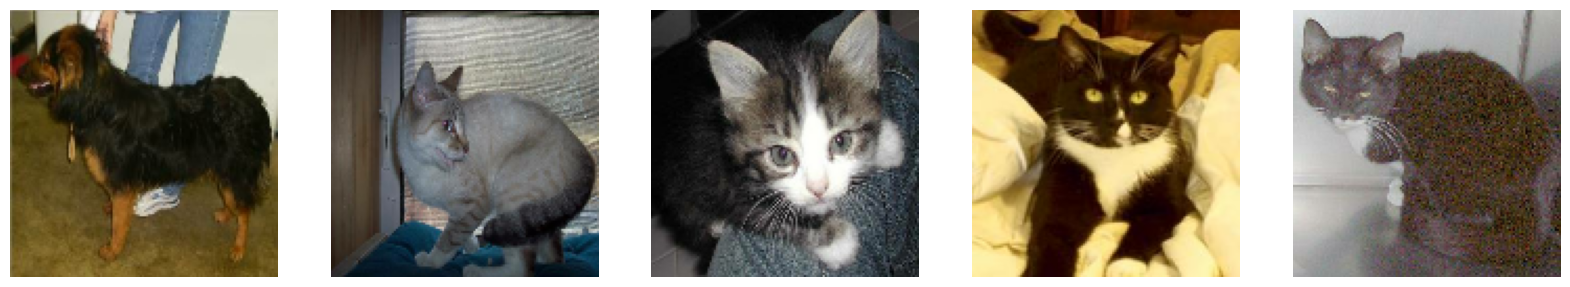

In [8]:
def plotimages(imagesls):
  fig, axes = plt.subplots(1, 5, figsize=(20,20))
  axes = axes.flatten()
  for image,ax in zip(imagesls, axes):
    ax.imshow(image)
    ax.axis('off')

imagesls=[]
for n, image in enumerate(X.take(5)):
  imagesls.append(image)

plotimages(imagesls)

## **1.4. Creating and Compiling model**

  - Craft the architecture of the convolutional neural network (CNN) by defining layers: convolutional, pooling, and dense layers.
  - Specify activation functions and regularization techniques to enhance model performance and generalization.
  - The model formulation stage crucially determines the network's capability to extract features and make accurate predictions on input data.

  - Compiling the model involves configuring the training process, specifying parameters such as the optimizer, loss function, and evaluation metrics.
  - The optimizer determines the update rule for the weights during training, while the loss function quantifies the model's performance by calculating the difference between predicted and actual values.
  

- Adam is an optimizer algorithm for weight updates during training.
- loss='binary_crossentropy' is a loss function for binary classification tasks.
- models.Sequential is a type of Keras model building neural networks layer by layer.
- activation='relu' is an activation function introducing non-linearity.
- pool_size=(2,2) specifies the size of the pooling window.
- activation='sigmoid' is an activation function for binary classification output.

The pooling window, specified by pool_size=(2,2), defines the area over which max pooling downsamples input data, with a 2x2 window utilized in this scenario.

In [9]:
def My_CNNmodel():

  model = tf.keras.models.Sequential()
  model.add(layers.Conv2D(8, (3, 3), padding='same',activation='relu', input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, 3)))
  model.add(layers.MaxPooling2D(pool_size=(2,2)))
  model.add(layers.Conv2D(16, (3, 3), padding='same',activation='relu'))
  model.add(layers.MaxPooling2D(pool_size=(2,2)))
  model.add(layers.Conv2D(32, (3, 3), padding='same',activation='relu'))
  model.add(layers.MaxPooling2D(pool_size=(2,2)))
  model.add(layers.Conv2D(64, (3, 3), padding='same',activation='relu'))
  model.add(layers.MaxPooling2D(pool_size=(2,2)))
  model.add(layers.Flatten())
  model.add(layers.Dense(512, activation='relu'))
  model.add(layers.Dense(1, activation='sigmoid'))

  opt=tf.keras.optimizers.Adam(0.001)
  model.compile(optimizer=opt,
              loss='binary_crossentropy', # loss='categorical_crossentropy' if softmax
              metrics=['accuracy'])

  return model

## **1.5. Visualizing the model**

- Visualize model architecture using tools like TensorFlow's summary function or external libraries such as TensorBoard.
- Graphically display layers, parameters, and connections within the neural network.
- Enhance understanding of information flow through the model, aiding in debugging and optimization processes.

![image.png](attachment:68f5d889-9ca0-49e3-8eff-2a86edcaf200.png)!

In [10]:
model=My_CNNmodel()
model.summary()

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 128, 128, 8)    │           224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 64, 64, 8)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 64, 64, 16)     │         1,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 32, 32, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 32, 32, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     2,097,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,122,705 (8.10 MB)

 Trainable params: 2,122,705 (8.10 MB)

 Non-trainable params: 0 (0.00 B)

## **1.6. Training the model**

- Feed data into the neural network, adjusting parameters to minimize loss.
- Conduct multiple epochs, updating weights via backpropagation.
- Monitor metrics like accuracy and loss for performance assessment.

Backpropagation is the method by which a neural network learns from its mistakes, adjusting its internal parameters to improve performance based on the errors it makes during training.

- Epochs indicate the number of complete passes through the entire training dataset during model training.
- Validation_data denotes the dataset used to evaluate model performance during training, assisting in preventing overfitting by monitoring generalization on unseen data.

In [11]:
hist=model.fit(dataset_train,epochs=20,validation_data=dataset_test)
model.save("/kaggle/working/drive/My Drive/DPprojects/DogvsCats/my_model.h5")

Epoch 1/20
  6/351 ━━━━━━━━━━━━━━━━━━━━ 10s 31ms/step - accuracy: 0.5312 - loss: 0.7036

I0000 00:00:1721825564.396888     114 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
W0000 00:00:1721825564.418619     114 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


350/351 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.6470 - loss: 0.6150

W0000 00:00:1721825585.015391     115 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


351/351 ━━━━━━━━━━━━━━━━━━━━ 31s 60ms/step - accuracy: 0.6473 - loss: 0.6147 - val_accuracy: 0.7676 - val_loss: 0.5018
Epoch 2/20
351/351 ━━━━━━━━━━━━━━━━━━━━ 21s 56ms/step - accuracy: 0.7702 - loss: 0.4743 - val_accuracy: 0.8121 - val_loss: 0.4019
Epoch 3/20
351/351 ━━━━━━━━━━━━━━━━━━━━ 21s 57ms/step - accuracy: 0.8169 - loss: 0.4047 - val_accuracy: 0.8277 - val_loss: 0.3767
Epoch 4/20
351/351 ━━━━━━━━━━━━━━━━━━━━ 21s 58ms/step - accuracy: 0.8374 - loss: 0.3612 - val_accuracy: 0.7885 - val_loss: 0.4312
Epoch 5/20
351/351 ━━━━━━━━━━━━━━━━━━━━ 20s 56ms/step - accuracy: 0.8610 - loss: 0.3231 - val_accuracy: 0.8706 - val_loss: 0.3044
Epoch 6/20
351/351 ━━━━━━━━━━━━━━━━━━━━ 21s 57ms/step - accuracy: 0.8846 - loss: 0.2744 - val_accuracy: 0.8822 - val_loss: 0.2798
Epoch 7/20
351/351 ━━━━━━━━━━━━━━━━━━━━ 21s 56ms/step - accuracy: 0.8995 - loss: 0.2365 - val_accuracy: 0.8946 - val_loss: 0.2646
Epoch 8/20
351/351 ━━━━━━━━━━━━━━━━━━━━ 21s 57ms/step - accuracy: 0.9200 - loss: 0.1931 - val_accurac

- plot_model_history visualizes training progress with accuracy and loss metrics.
- It takes model_history object as input, typically from model training functions.
- Two subplots show accuracy and loss over epochs.
- Helps assess model performance and overfitting.
- Provides insights for hyperparameter adjustments.

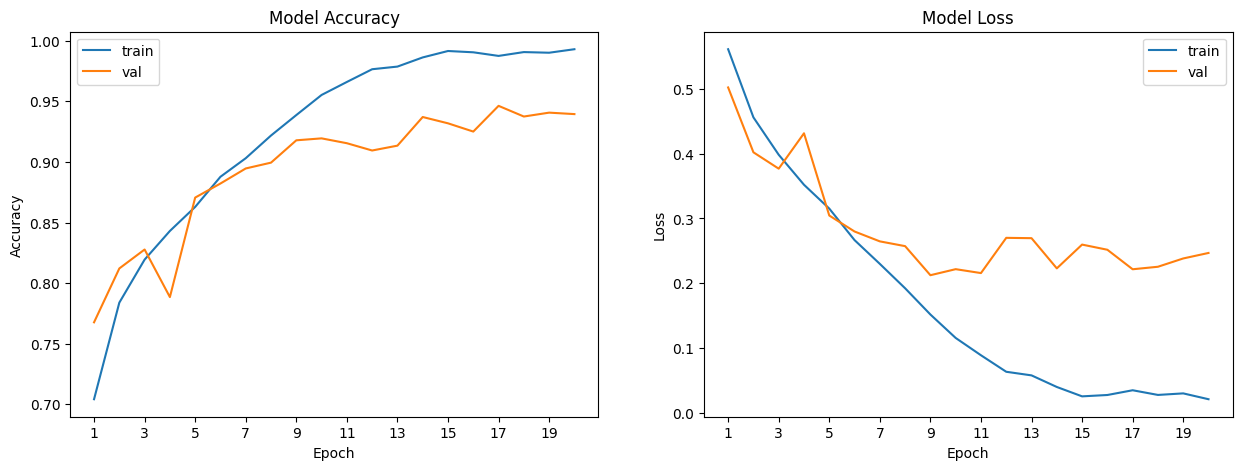

In [12]:
def plot_model_history(model_history, acc='accuracy', val_acc='val_accuracy'):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    axs[0].plot(range(1,len(model_history.history[acc])+1),model_history.history[acc])
    axs[0].plot(range(1,len(model_history.history[val_acc])+1),model_history.history[val_acc])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history[acc])+1,len(model_history.history[acc])/10))
    axs[0].legend(['train', 'val'], loc='best')
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1,len(model_history.history['loss'])/10))
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()

plot_model_history(hist)

- Inconsistencies between training and validation metrics in model performance may result from:
  - Differences in data augmentation techniques between training and validation data generators.
  - Overfitting issues addressed through regularization methods.
  - Disparities in class distribution across datasets.
- Additional steps for improving generalization performance include:
  - Simplifying model architecture.
  - Fine-tuning learning rates.
- These actions promote alignment between training and validation metrics, crucial for accurately evaluating model performance and generalization to unseen data.

## **1.7. Evaluating model**

- Evaluate model using validation dataset and metrics like accuracy, precision, recall, and F1-score.
- Utilize confusion matrices to understand prediction distribution and identify areas for improvement, with annotations indicating counts or percentages in each cell.

39/39 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - accuracy: 0.9515 - loss: 0.1810
Test: accuracy = 0.939904  ;  loss = 0.241317 
39/39 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step


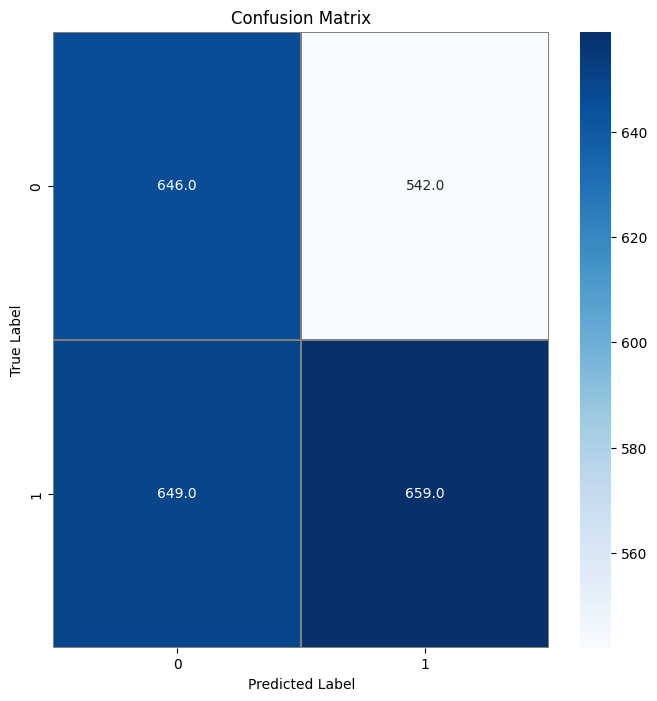

In [13]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
# Predict the values from the validation dataset

loss, accuracy = model.evaluate(dataset_test)
print("Test: accuracy = %f  ;  loss = %f " % (accuracy, loss))
y_pred =  model.predict(dataset_test)
y_p = np.where(y_pred > 0.5, 1,0)
test_data=dataset_test.unbatch()
y_g=[]
for image, label in  test_data:
  y_g.append(label.numpy())

confusion_mtx = confusion_matrix(y_g, y_p)
# plot the confusion matrix
f,ax = plt.subplots(figsize=(8, 8))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,cmap="Blues",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

- Generates a detailed report of model performance metrics.
- Compares actual labels with predicted labels to evaluate classification effectiveness.
- target_names parameter specifies class names for readability in the report.

In [14]:
# Generate a classification report
report = classification_report(y_g, y_p, target_names=['0','1'])
print(report)

              precision    recall  f1-score   support

           0       0.50      0.54      0.52      1188
           1       0.55      0.50      0.53      1308

    accuracy                           0.52      2496
   macro avg       0.52      0.52      0.52      2496
weighted avg       0.52      0.52      0.52      2496



Now that the model is not yielding satisfactory results, let's delve further data exploration.

## **1.8 More Data exploration**

Further data exploration involves analyzing specific features, visualizing data using various techniques, and conducting statistical analyses to uncover hidden patterns and anomalies, ultimately enhancing model performance and understanding of the dataset.

### **1.8.1.Data Augmentation**

- Data augmentation techniques enhance training data diversity and quantity, boosting model robustness and generalization.
- Common methods include random rotations, shifts, flips, and adjustments in brightness or contrast.
- Introducing variations in training images helps the model adapt to diverse scenarios and real-world data.

- ImageDataGenerator is used for data augmentation and preprocessing of images in TensorFlow.

In [15]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

**A.Horizontal Flip-**

- image_gen_flip is an instance of ImageDataGenerator configured with rescaling and horizontal flipping settings.
- train_data_gen generates batches of augmented images from the specified directory, with rescaled dimensions and shuffling.
- augmented_images represent a list of the first five augmented images generated from the training data.


Found 21000 images belonging to 2 classes.


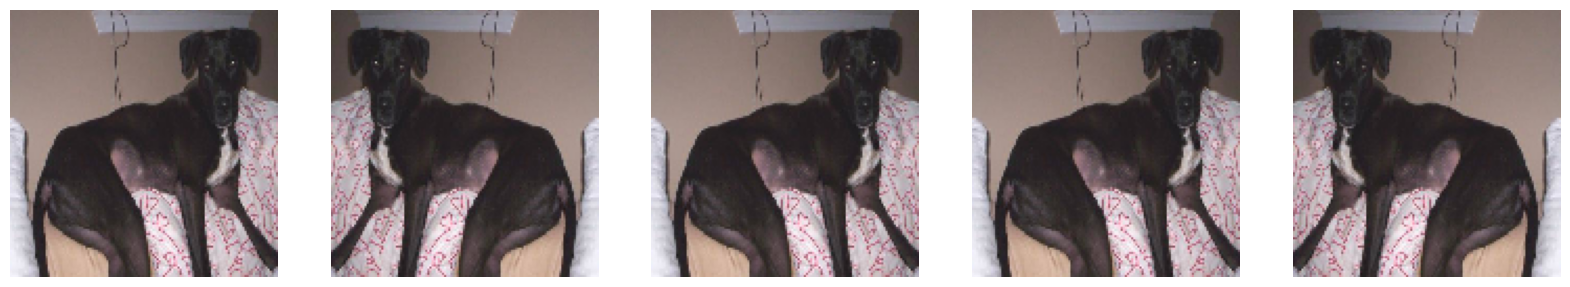

In [16]:
image_gen_flip = ImageDataGenerator(rescale=1./255, horizontal_flip=True)
train_data_gen = image_gen_flip.flow_from_directory(batch_size=BATCH_SIZE,directory="/kaggle/working/Image-Classification-CNN-and-VGG/dataset/dataset_seperated/train",shuffle=True,target_size=(IMAGE_HEIGHT, IMAGE_WIDTH))
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotimages(augmented_images)

**B.Rotation-**

Found 21000 images belonging to 2 classes.


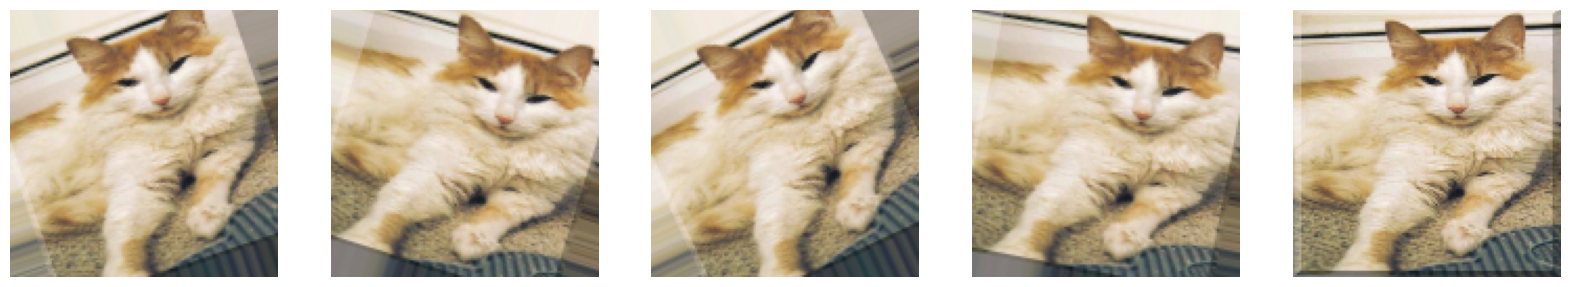

In [17]:
image_gen_rotate = ImageDataGenerator(rescale=1./255, rotation_range=45)
train_data_gen = image_gen_rotate.flow_from_directory(batch_size=BATCH_SIZE,
                                                       directory="/kaggle/working/Image-Classification-CNN-and-VGG/dataset/dataset_seperated/train",
                                                       shuffle=True,
                                                       target_size=(IMAGE_HEIGHT, IMAGE_WIDTH))

augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotimages(augmented_images)

**C.Zoom Augumentation-**

Found 21000 images belonging to 2 classes.


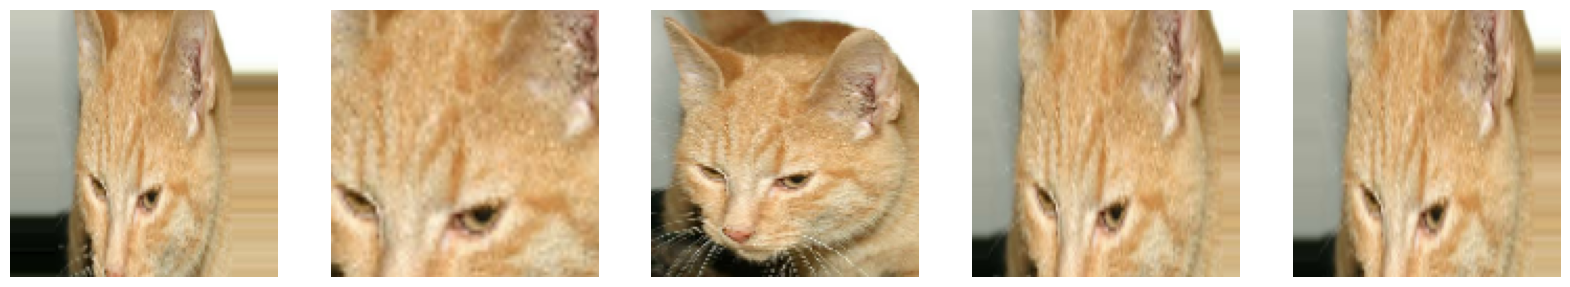

In [18]:
image_gen_zoom = ImageDataGenerator(rescale=1./255, zoom_range=0.5)
train_data_gen = image_gen_zoom.flow_from_directory(batch_size=BATCH_SIZE,
                                                    directory="/kaggle/working/Image-Classification-CNN-and-VGG/dataset/dataset_seperated/train",
                                                    shuffle=True,
                                                    target_size=(IMAGE_HEIGHT, IMAGE_WIDTH))

augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotimages(augmented_images)

**D.Pull together-**

- "Pull together" to consolidate and streamline the data augmentation process, reducing redundancy and ensuring uniformity in image transformations across both training and validation datasets.
- shuffle=True shuffles the data to ensure randomness in batch selection during training, preventing the model from learning spurious correlations in the order of data.
- class_mode='binary' specifies the type of label arrays returned by the generator. In this case, it indicates binary labels, meaning the model expects binary classification outputs.

In [19]:
image_gen_train = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=45,
                    width_shift_range=.15,
                    height_shift_range=.15,
                    horizontal_flip=True,
                    zoom_range=0.5
                    )
train_data_gen = image_gen_train.flow_from_directory(batch_size=BATCH_SIZE,
                                                     directory="/kaggle/working/Image-Classification-CNN-and-VGG/dataset/dataset_seperated/train",
                                                     shuffle=True,
                                                     target_size=(IMAGE_HEIGHT, IMAGE_WIDTH),
                                                     class_mode='binary')
validation_data_gen = image_gen_train.flow_from_directory(batch_size=BATCH_SIZE,
                                                     directory="/kaggle/working/Image-Classification-CNN-and-VGG/dataset/dataset_seperated/validation",
                                                     shuffle=True,
                                                     target_size=(IMAGE_HEIGHT, IMAGE_WIDTH),
                                                     class_mode='binary')

Found 21000 images belonging to 2 classes.
Found 4000 images belonging to 2 classes.


- Plots the first five augmented images from the training data generator.

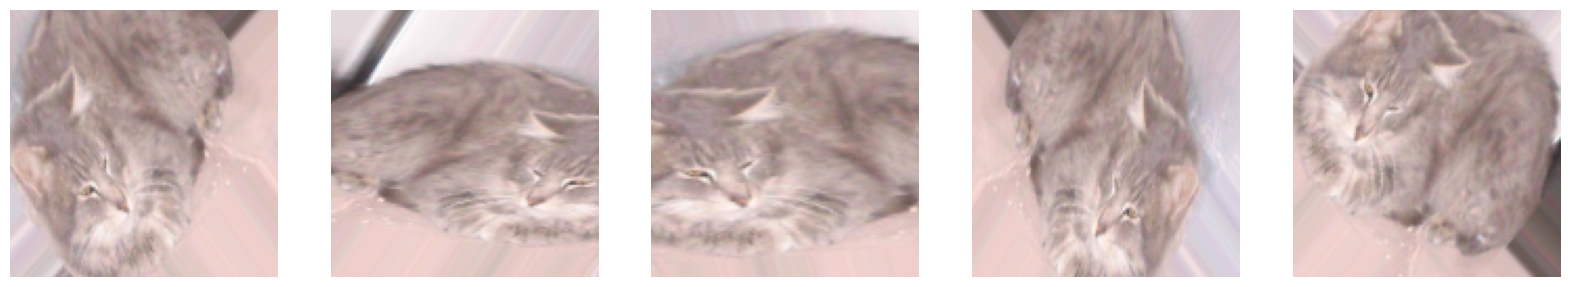

In [20]:
plotimages([train_data_gen[0][0][0] for i in range(5)])

## **1.9. Predicting outputs**

- Feed unseen images into the trained model to obtain predictions for each image class.
- Compare these predictions against ground truth labels to assess the model's real-world performance and accuracy in classifying images of cats and dogs.

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 919ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


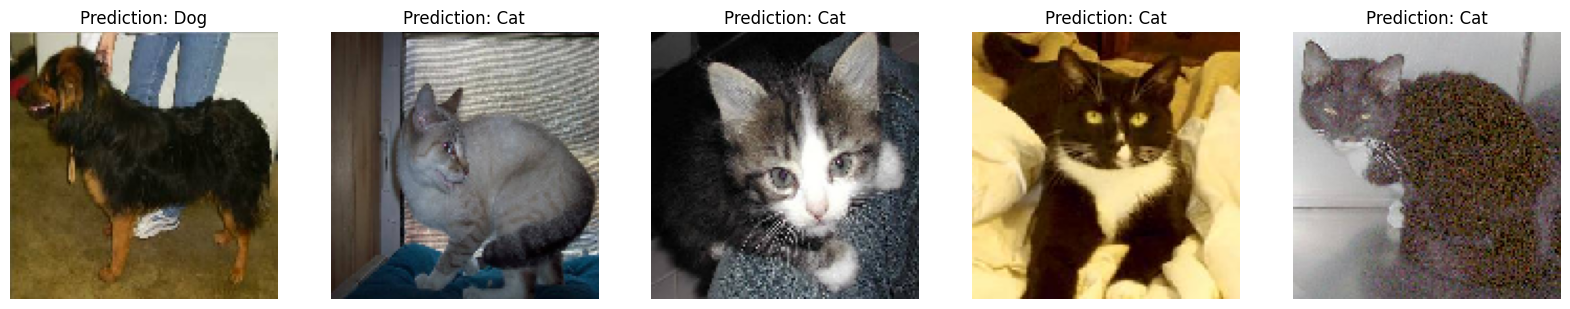

In [21]:
# Create a figure to display the predictions
figure = plt.figure(figsize=(20, 8))

# Iterate through the first 5 rows of the dataframe
for i, row in df.head(5).iterrows():
    # Load the image
    img_path = row['paths']
    img = tf.keras.preprocessing.image.load_img(img_path, target_size=(128, 128))
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = img_array / 255.0  # Normalize the image

    # Predict for the image
    prediction = model.predict(np.expand_dims(img_array, axis=0))
    class_label = "Dog" if prediction[0][0] > 0.5 else "Cat"

    # Display the image and predicted class
    ax = figure.add_subplot(1, 5, i + 1, xticks=[], yticks=[])
    ax.imshow(img)
    ax.set_title(f"Prediction: {class_label}")
    ax.axis('off')

plt.show()



- Challenges encountered during initial training phase:
  - Overfitting
  - Limited model performance

- Techniques to address challenges:
  - Data augmentation:
    - Apply transformations (rotation, scaling, flipping) to generate additional training data
    - Diversify training samples
    - Mitigate overfitting
  - Increasing number of training epochs:
    - Allow more iterations of learning
    - Refine model parameters
    - Improve classification accuracy

- Objective:
  - Overcome limitations encountered in initial training phase
  - Enhance performance of image classification model

- Approach:
  - Retrain the model
  - Employ data augmentation and increased training epochs.

# **2. Retrain the Model**

####[Go Back To Top](#scrollTo=zffFUYjWv65x)


Now,start with Model retraining.

## **2.1. Compiling Models**

In [22]:
def Mynew_CNNmodel():

  model = tf.keras.models.Sequential()
  model.add(layers.Conv2D(8, (3, 3), padding='same',activation='relu', input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, 3)))
  model.add(layers.MaxPooling2D(pool_size=(2,2)))
  model.add(layers.BatchNormalization())
  model.add(layers.Dropout(0.2))
  model.add(layers.Conv2D(32, (3, 3), padding='same',activation='relu'))
  model.add(layers.MaxPooling2D(pool_size=(2,2)))
  model.add(layers.BatchNormalization())
  model.add(layers.Dropout(0.2))
  model.add(layers.Conv2D(64, (3, 3), padding='same',activation='relu'))
  model.add(layers.MaxPooling2D(pool_size=(2,2)))
  model.add(layers.BatchNormalization())
  model.add(layers.Flatten())
  model.add(layers.Dense(512, activation='relu'))
  model.add(layers.Dense(1, activation='sigmoid'))

  opt=tf.keras.optimizers.Adam(0.001)
  model.compile(optimizer=opt,
              loss='binary_crossentropy', # loss='categorical_crossentropy' if softmax
              metrics=['accuracy'])

  return model

- Increase the number of epochs to 30 for model training, providing more opportunities for the model to learn from the augmented training data and potentially improve performance.

## **2.2. Training the Models**

In [23]:
new_model=Mynew_CNNmodel()
new_hist=new_model.fit(train_data_gen,epochs=30,validation_data=validation_data_gen)

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


  1/329 ━━━━━━━━━━━━━━━━━━━━ 1:03:30 12s/step - accuracy: 0.4844 - loss: 0.9066

W0000 00:00:1721826031.758080     114 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


 89/329 ━━━━━━━━━━━━━━━━━━━━ 1:37 408ms/step - accuracy: 0.5360 - loss: 1.6258

W0000 00:00:1721826067.645278     115 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


328/329 ━━━━━━━━━━━━━━━━━━━━ 0s 367ms/step - accuracy: 0.5848 - loss: 1.0167

W0000 00:00:1721826153.760814     117 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


329/329 ━━━━━━━━━━━━━━━━━━━━ 156s 441ms/step - accuracy: 0.5851 - loss: 1.0149 - val_accuracy: 0.5005 - val_loss: 2.8876
Epoch 2/30


W0000 00:00:1721826176.286765     116 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


329/329 ━━━━━━━━━━━━━━━━━━━━ 142s 423ms/step - accuracy: 0.6604 - loss: 0.6039 - val_accuracy: 0.6250 - val_loss: 0.6640
Epoch 3/30
329/329 ━━━━━━━━━━━━━━━━━━━━ 142s 423ms/step - accuracy: 0.6857 - loss: 0.5889 - val_accuracy: 0.6075 - val_loss: 0.6688
Epoch 4/30
329/329 ━━━━━━━━━━━━━━━━━━━━ 141s 421ms/step - accuracy: 0.7061 - loss: 0.5617 - val_accuracy: 0.6308 - val_loss: 0.6733
Epoch 5/30
329/329 ━━━━━━━━━━━━━━━━━━━━ 141s 422ms/step - accuracy: 0.7165 - loss: 0.5492 - val_accuracy: 0.6425 - val_loss: 0.7023
Epoch 6/30
329/329 ━━━━━━━━━━━━━━━━━━━━ 141s 420ms/step - accuracy: 0.7304 - loss: 0.5359 - val_accuracy: 0.7097 - val_loss: 0.5504
Epoch 7/30
329/329 ━━━━━━━━━━━━━━━━━━━━ 141s 422ms/step - accuracy: 0.7364 - loss: 0.5193 - val_accuracy: 0.6775 - val_loss: 0.6388
Epoch 8/30
329/329 ━━━━━━━━━━━━━━━━━━━━ 141s 421ms/step - accuracy: 0.7503 - loss: 0.5042 - val_accuracy: 0.6948 - val_loss: 0.6467
Epoch 9/30
329/329 ━━━━━━━━━━━━━━━━━━━━ 142s 423ms/step - accuracy: 0.7587 - loss: 0.49

## **2.3. Visualizing the model**

- Plot the training history of the new model.

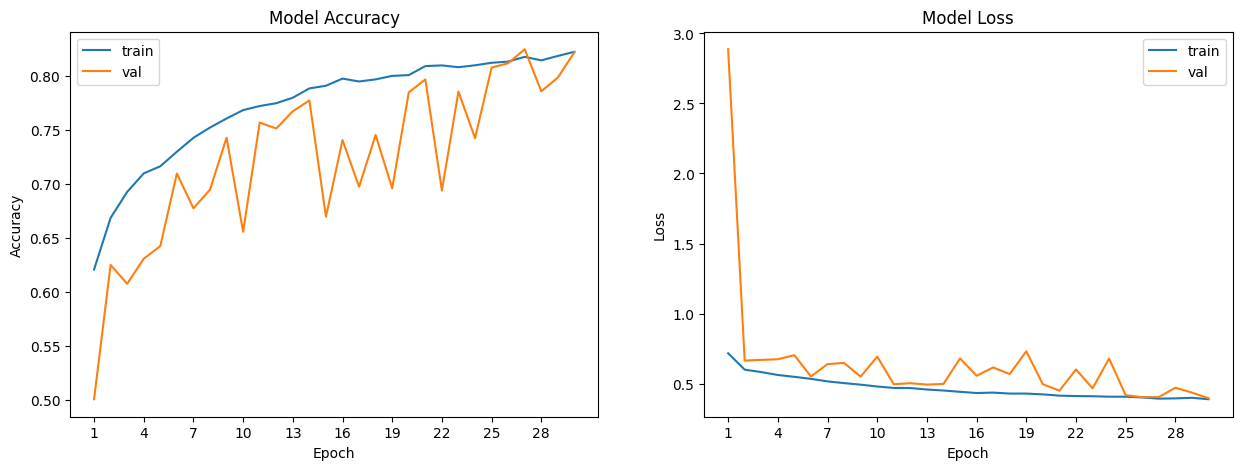

In [24]:
plot_model_history(new_hist)

# **Train result vs Retrain result**

- Initial training phase may face challenges like underfitting or suboptimal convergence due to limited epochs or dataset size.
- Retraining addresses these issues through techniques like data augmentation or increasing training epochs, refining the model further.
- Comparing outcomes of initial training and retraining provides insights into effectiveness of adjustments in enhancing accuracy and reducing loss.
- Analysis guides identification and implementation of strategies to optimize model performance in image classification tasks.

# **3. Creating Model Using Transfer Learning - VGG16**

####[Go Back To Top](#scrollTo=zffFUYjWv65x)


- Transfer learning with the VGG16 model involves leveraging pre-trained weights and architecture from VGG16, a powerful CNN architecture.
- VGG16 model is a convolutional neural network architecture with 16 layers, known for its deep architecture and superior performance in image classification tasks.
- Fine-tuning the pre-trained VGG16 model on the cat vs. dog image classification task helps adapt its learned features to our dataset.
- This approach saves time and computational resources compared to training a model from scratch, while often achieving competitive performance.

**Advantages**

- Leveraging VGG16 for transfer learning offers significant advantages, utilizing pre-trained weights to extract hierarchical features from images and saving time and computational resources.
- Fine-tuning the model's parameters, particularly the final layers, allows adaptation to specific classification tasks, enhancing performance.
- Transfer learning with VGG16 often leads to models that generalize well to new datasets, particularly beneficial when the target dataset is small or similar to the original ImageNet dataset.
- Overall, the combination of VGG16's robust pre-training and its suitability for transfer learning facilitates faster convergence and better performance on various image-related tasks.

**Uses**

- VGG16 is extensively used in deep learning due to its pre-training on the ImageNet dataset, providing rich learned features.
- The pre-training serves as a solid foundation for effective recognition of various patterns and shapes in images.
- VGG16's straightforward architecture, consisting of convolutional and pooling layers followed by fully connected layers, makes it easy to comprehend and implement.
- Beyond image classification, VGG16's learned features can be repurposed for tasks like object detection and segmentation.

- optimizers.SGD(learning_rate=1e-4, momentum=0.9) configures the Stochastic Gradient Descent (SGD) optimizer with a specific learning rate (1e-4) and momentum (0.9).
- SGD optimizer minimizes binary cross-entropy loss during training by adjusting model weights based on computed gradients.
- Learning rate (1e-4) controls step size in optimization, while momentum (0.9) accelerates gradient descent and dampens oscillations.

## **3.1. Formulating model**

In [25]:
from tensorflow.keras.applications import VGG16

pre_trained_model = VGG16(input_shape=(IMAGE_WIDTH,IMAGE_HEIGHT,3), include_top=False, weights="imagenet")

for layer in pre_trained_model.layers[:15]:
    layer.trainable = False

for layer in pre_trained_model.layers[15:]:
    layer.trainable = True

last_layer = pre_trained_model.get_layer('block5_pool')
last_output = last_layer.output
x = layers.Flatten()(last_output)
x = layers.Dense(512, activation='relu')(x)
x = layers.Dropout(0.5)(x)
x = layers.Dense(1, activation='sigmoid')(x)

vggmodel = tf.keras.models.Model(pre_trained_model.input, x)


vggmodel.compile(loss='binary_crossentropy',
                 optimizer=tf.keras.optimizers.SGD(learning_rate=1e-4, momentum=0.9),
                 metrics=['accuracy'])

vggmodel.summary()

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "functional_25"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 128, 128, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 128, 128, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 128, 128, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 64, 64, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 64, 64, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 64, 64, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 32, 32, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 32, 32, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 32, 32, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 32, 32, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 16, 16, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 16, 16, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 16, 16, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 16, 16, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 8, 8, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 8, 8, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 8, 8, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 8, 8, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 4, 4, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 512)            │     4,194,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 18,910,017 (72.14 MB)

 Trainable params: 11,274,753 (43.01 MB)

 Non-trainable params: 7,635,264 (29.13 MB)

## **3.2. Training the model**

In [26]:
vgghist=vggmodel.fit(dataset_train,epochs=20,validation_data=dataset_test)


Epoch 1/20
  2/351 ━━━━━━━━━━━━━━━━━━━━ 31s 91ms/step - accuracy: 0.5312 - loss: 0.7586   

W0000 00:00:1721830300.953308     114 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


351/351 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step - accuracy: 0.6882 - loss: 0.5662

W0000 00:00:1721830342.447133     117 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


351/351 ━━━━━━━━━━━━━━━━━━━━ 71s 127ms/step - accuracy: 0.6884 - loss: 0.5658 - val_accuracy: 0.8726 - val_loss: 0.2874
Epoch 2/20
351/351 ━━━━━━━━━━━━━━━━━━━━ 45s 126ms/step - accuracy: 0.8743 - loss: 0.2929 - val_accuracy: 0.8990 - val_loss: 0.2355
Epoch 3/20
351/351 ━━━━━━━━━━━━━━━━━━━━ 45s 125ms/step - accuracy: 0.8967 - loss: 0.2431 - val_accuracy: 0.9155 - val_loss: 0.1982
Epoch 4/20
351/351 ━━━━━━━━━━━━━━━━━━━━ 45s 126ms/step - accuracy: 0.9095 - loss: 0.2172 - val_accuracy: 0.9163 - val_loss: 0.1919
Epoch 5/20
351/351 ━━━━━━━━━━━━━━━━━━━━ 81s 124ms/step - accuracy: 0.9192 - loss: 0.1960 - val_accuracy: 0.9243 - val_loss: 0.1734
Epoch 6/20
351/351 ━━━━━━━━━━━━━━━━━━━━ 45s 126ms/step - accuracy: 0.9251 - loss: 0.1823 - val_accuracy: 0.9287 - val_loss: 0.1657
Epoch 7/20
351/351 ━━━━━━━━━━━━━━━━━━━━ 45s 125ms/step - accuracy: 0.9334 - loss: 0.1688 - val_accuracy: 0.9323 - val_loss: 0.1633
Epoch 8/20
351/351 ━━━━━━━━━━━━━━━━━━━━ 45s 125ms/step - accuracy: 0.9343 - loss: 0.1632 - val

In [27]:
vggmodel.save("/kaggle/working/drive/My Drive/DPprojects/DogvsCats/vggmodel.h5")

-  visualizes the training history of the VGG16-based model by plotting its accuracy and loss metrics across epochs.

## **3.3. Visualizing the model**

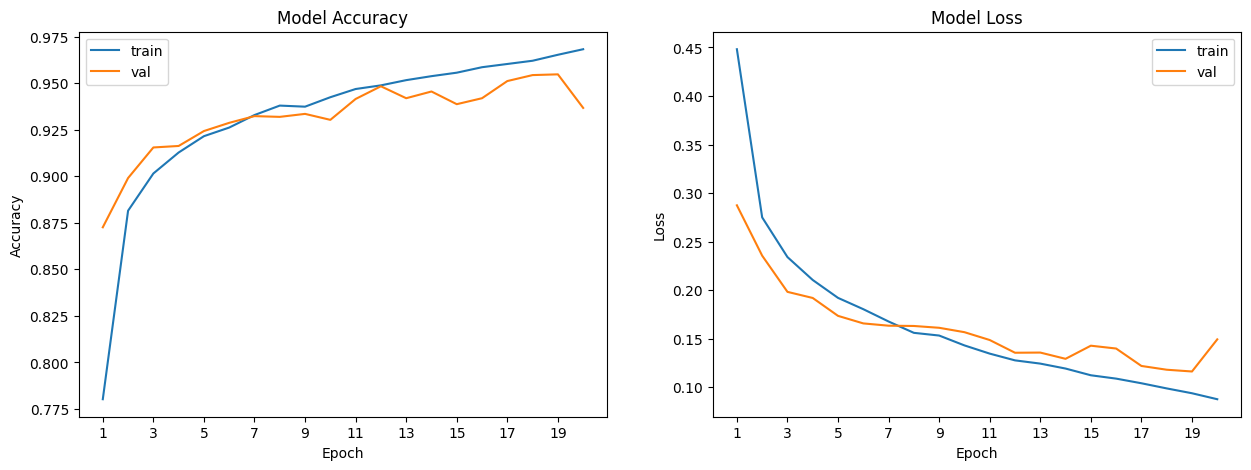

In [28]:
plot_model_history(vgghist)

In [29]:
loss, accuracy = vggmodel.evaluate(dataset_test)
print("Test: accuracy = %f  ;  loss = %f " % (accuracy, loss))

39/39 ━━━━━━━━━━━━━━━━━━━━ 12s 79ms/step - accuracy: 0.9428 - loss: 0.1302
Test: accuracy = 0.938301  ;  loss = 0.140802 


- It generates predictions using the VGG16-based model on the test dataset.
- In this applies a threshold of 0.5 to the predicted probabilities to classify images as either 1 (dog) or 0 (cat).

In [30]:
vgg_y_pred =  model.predict(dataset_test)
vgg_y_p = np.where(vgg_y_pred > 0.5, 1,0)

39/39 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step


- `sns.heatmap` is a Seaborn function used to plot rectangular data as a color-encoded matrix. It visualizes a matrix of data where each cell's color represents the value of the data point, making it easy to identify patterns and relationships in the data.

## **3.4. Evaluating Model**

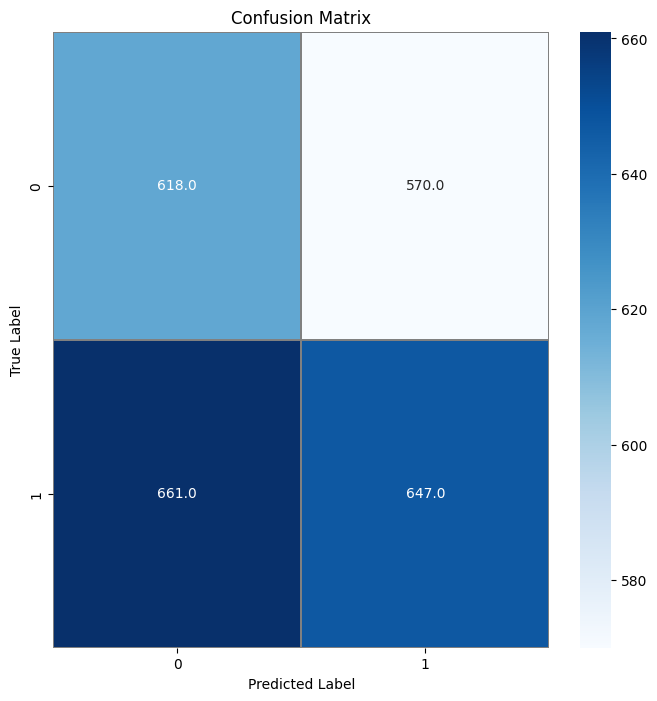

In [31]:
# compute the confusion matrix
confusion_mtx = confusion_matrix(y_g, vgg_y_p)
# plot the confusion matrix
f,ax = plt.subplots(figsize=(8, 8))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,cmap="Blues",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [32]:
report = classification_report(y_g, vgg_y_p, target_names=['0','1'])
print(report)


              precision    recall  f1-score   support

           0       0.48      0.52      0.50      1188
           1       0.53      0.49      0.51      1308

    accuracy                           0.51      2496
   macro avg       0.51      0.51      0.51      2496
weighted avg       0.51      0.51      0.51      2496



- This predicts the classes of the first 10 images in a DataFrame by loading each image, normalizing it, and using a pre-trained VGG16 model (`vggmodel`) to predict whether the image contains a dog or a cat.

## **3.5. Predicting Outputs**

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


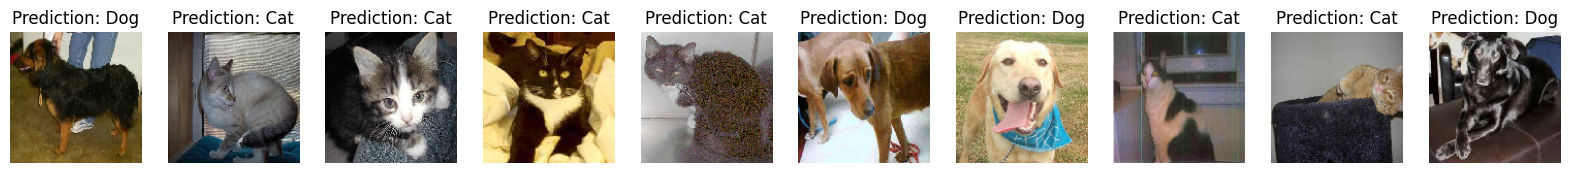

In [33]:
# Assuming you have a DataFrame 'df' with a column named 'paths' containing image paths
# Take the first 10 image paths
image_paths = df['paths'].tolist()[:10]

# Create a figure to display the predictions
figure = plt.figure(figsize=(20, 8))

# Iterate through the image paths
for i, img_path in enumerate(image_paths):
    # Load the image
    img = tf.keras.preprocessing.image.load_img(img_path, target_size=(128, 128))
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = img_array / 255.0  # Normalize the image

    # Predict for the image
    prediction = vggmodel.predict(np.expand_dims(img_array, axis=0))
    class_label = "Dog" if prediction[0][0] > 0.5 else "Cat"

    # Display the image and predicted class
    ax = figure.add_subplot(1, 10, i + 1)
    ax.imshow(img)
    ax.set_title(f"Prediction: {class_label}")
    ax.axis('off')

plt.show()


# **4. Comparison of VGG16 model result vs Retrain result**

####[Go Back To Top](#scrollTo=zffFUYjWv65x)



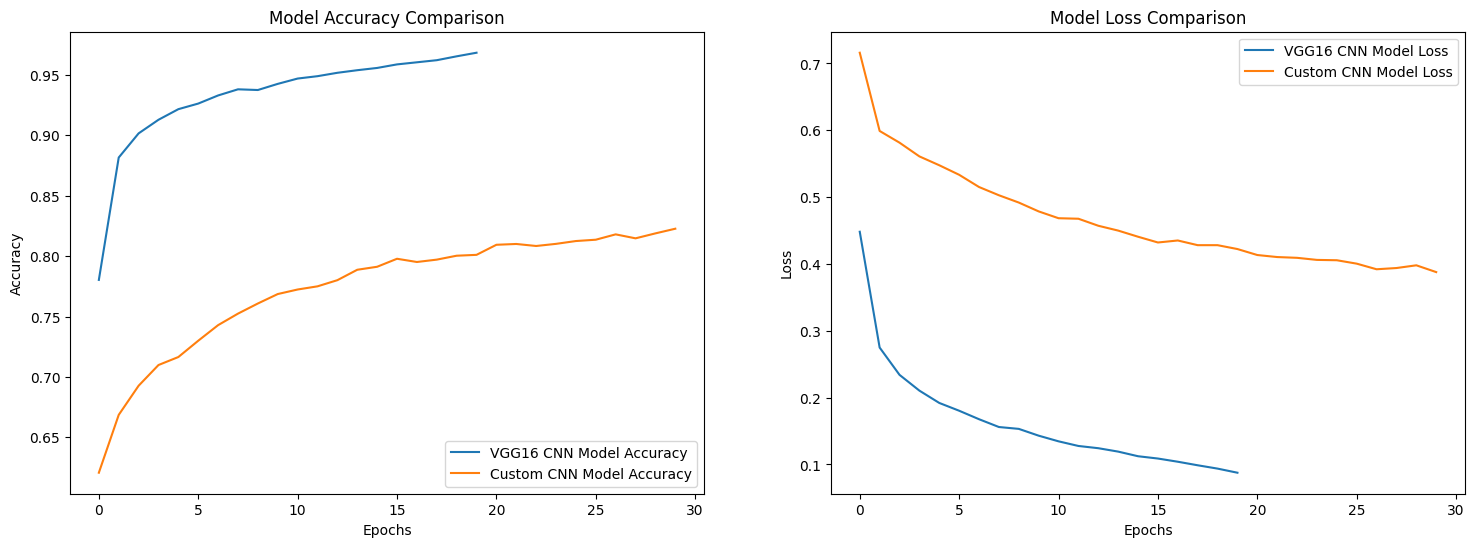

In [34]:

# Create a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(18, 6))

# Plotting accuracy
axs[0].plot(vgghist.history['accuracy'], label='VGG16 CNN Model Accuracy')
axs[0].plot(new_hist.history['accuracy'], label='Custom CNN Model Accuracy')
axs[0].set_title('Model Accuracy Comparison')
axs[0].set_xlabel('Epochs')
axs[0].set_ylabel('Accuracy')
axs[0].legend()

# Plotting loss
axs[1].plot(vgghist.history['loss'], label='VGG16 CNN Model Loss')
axs[1].plot(new_hist.history['loss'], label='Custom CNN Model Loss')
axs[1].set_title('Model Loss Comparison')
axs[1].set_xlabel('Epochs')
axs[1].set_ylabel('Loss')
axs[1].legend()

plt.show()


- Pre-trained models like VGG-16 offer effective feature extraction and classification capabilities.
- They are already fine-tuned on large datasets, resulting in superior performance.
- Comparing custom CNN models with VGG-16 demonstrates the advantage of leveraging pre-trained models.
- Pre-trained models are preferred for various computer vision tasks due to their established effectiveness and efficiency.